# import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Read load dataset

In [2]:
!pip install sklearn.preprocessing

In [3]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

In [4]:
hrt_df=pd.read_csv(r"C:\Users\GCE PMNA\Downloads\heart.csv")

In [5]:
hrt_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
hrt_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
hrt_df.shape

(918, 12)

In [8]:
hrt_df.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [9]:
hrt_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
hrt_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
for i in hrt_df.columns:
    print(i,':-')
    print(hrt_df[i].unique())

Age :-
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex :-
['M' 'F']
ChestPainType :-
['ATA' 'NAP' 'ASY' 'TA']
RestingBP :-
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol :-
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 

In [12]:
hrt_df['Cholesterol']=hrt_df['Cholesterol'].replace(0, np.nan)
hrt_df['Cholesterol']=hrt_df['Cholesterol'].fillna(hrt_df['Cholesterol'].median())

In [13]:
hrt_df['RestingBP']=hrt_df['RestingBP'].replace(0, np.nan)
hrt_df['RestingBP']=hrt_df['RestingBP'].fillna(hrt_df['RestingBP'].median())
hrt_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


In [14]:
hrt_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [15]:
hrt_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Outlier detection

In [16]:
num_cols =['RestingBP','Cholesterol','MaxHR','Oldpeak']

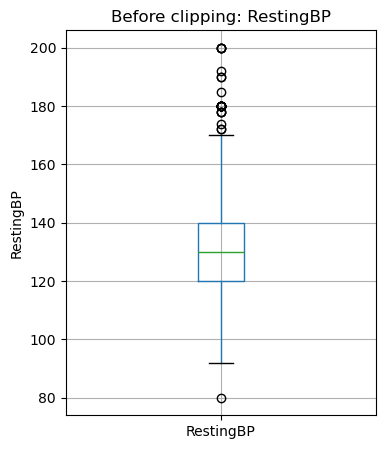

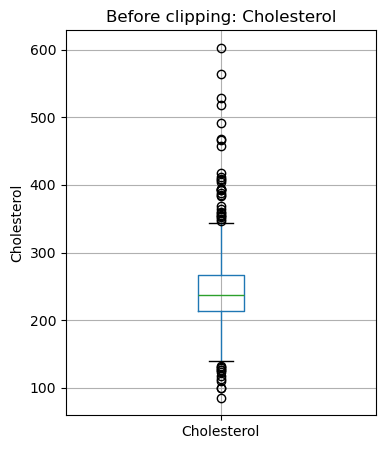

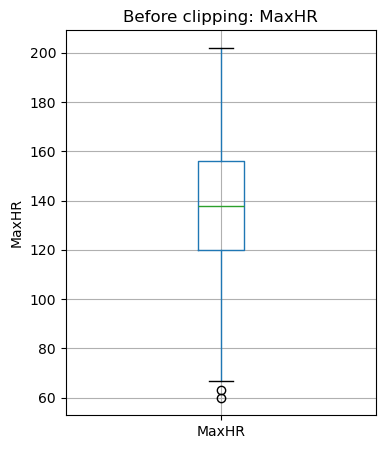

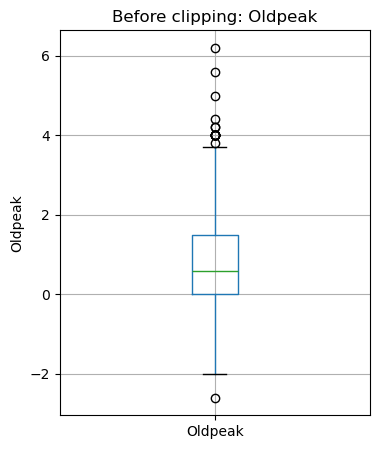

In [17]:
for col in num_cols:
    plt.figure(figsize=(4,5))
    hrt_df.boxplot(column=[col])
    plt.title(f"Before clipping: {col}")
    plt.ylabel(col)
    plt.show()

In [18]:
for col in num_cols:
    Q1 = hrt_df[col].quantile(0.25)
    Q2 = hrt_df[col].quantile(0.75)
    IQR = Q2 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q2 + 1.5 * IQR 
    hrt_df[col]=hrt_df[col].clip(lower,upper)

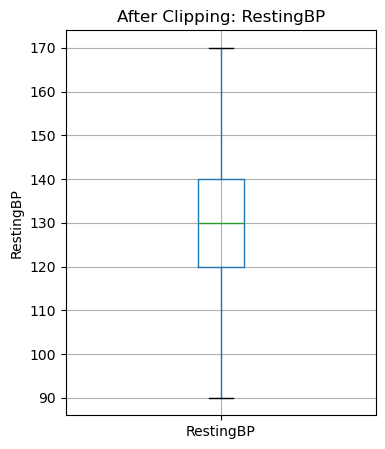

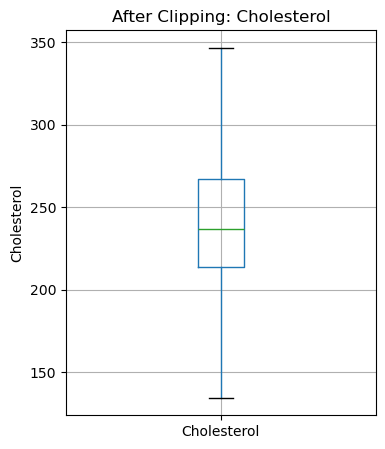

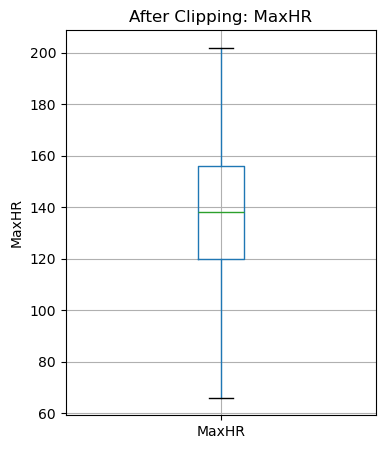

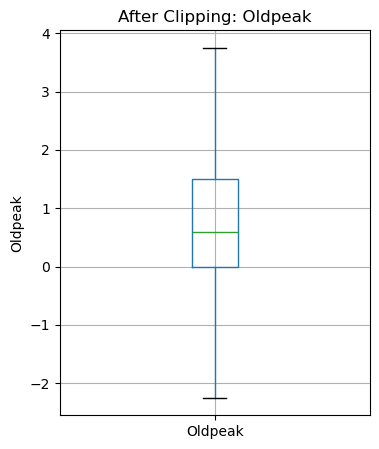

In [19]:
for col in num_cols:
    plt.figure(figsize=(4,5))
    hrt_df.boxplot(column=[col])
    plt.title(f"After Clipping: {col}")
    plt.ylabel(col)
    plt.show()

# Data visualisation

### Univariate Analysis

##### hisplot

C:\Users\GCE PMNA\AppData\Local\Temp\ipykernel_15596\2392859264.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(hrt_df['Cholesterol'],kde=True,palette="greens")


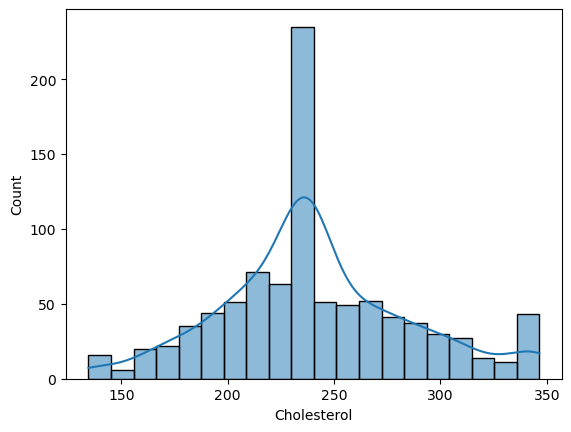

In [20]:
sns.histplot(hrt_df['Cholesterol'],kde=True,palette="greens")
plt.show()

##### countplot

C:\Users\GCE PMNA\AppData\Local\Temp\ipykernel_15596\348339661.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ChestPainType',data=hrt_df,palette="Set1")


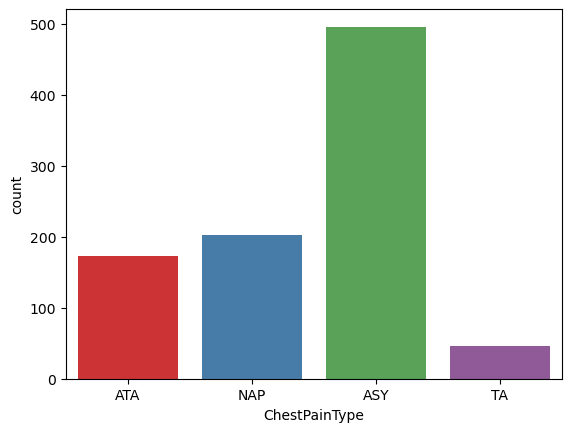

In [21]:
sns.countplot(x='ChestPainType',data=hrt_df,palette="Set1")
plt.show()

##### distplot

C:\Users\GCE PMNA\AppData\Local\Temp\ipykernel_15596\4079349951.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(hrt_df['Cholesterol'],kde=True,bins=10,palette="Reds")


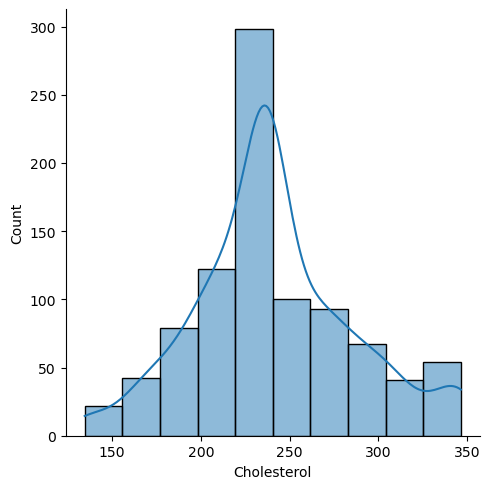

In [22]:
sns.displot(hrt_df['Cholesterol'],kde=True,bins=10,palette="Reds")
plt.show()

### Bivariate Analysis

##### Boxplot

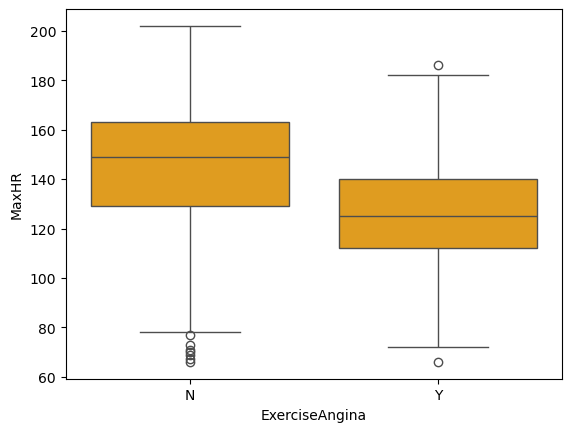

In [23]:
sns.boxplot(x='ExerciseAngina',y= 'MaxHR',data=hrt_df,color='orange')
plt.show()

##### Violin plot

C:\Users\GCE PMNA\AppData\Local\Temp\ipykernel_15596\2718936888.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease',y='Cholesterol',data=hrt_df,palette="Greens")


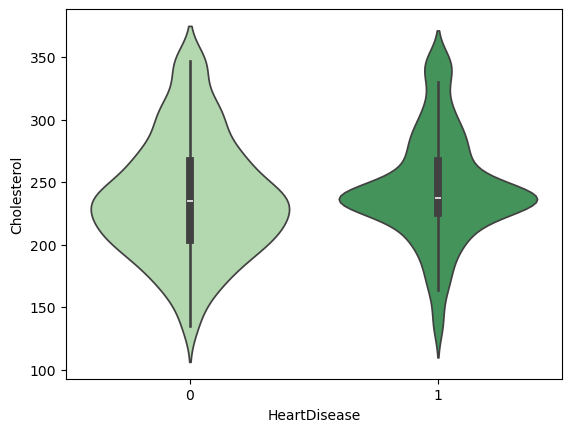

In [24]:
sns.violinplot(x='HeartDisease',y='Cholesterol',data=hrt_df,palette="Greens")
plt.show()

##### Barplot

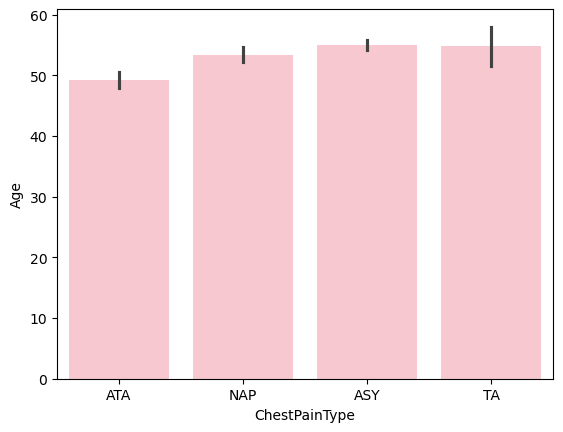

In [25]:
sns.barplot(x='ChestPainType',y='Age',data=hrt_df,color='Pink')
plt.show()

### Multivariate Analysis

##### Heatmap

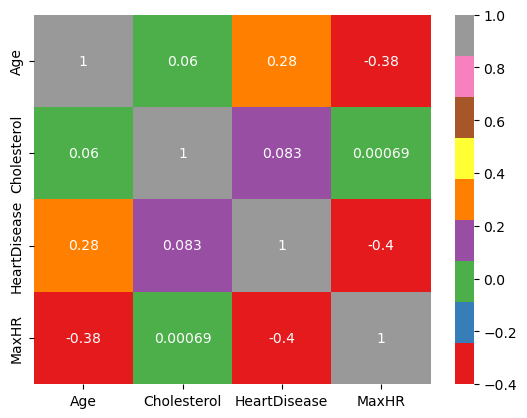

In [26]:
sns.heatmap(hrt_df[['Age','Cholesterol','HeartDisease','MaxHR']].corr(),annot=True,cmap='Set1')
plt.show()

##### Pairplot

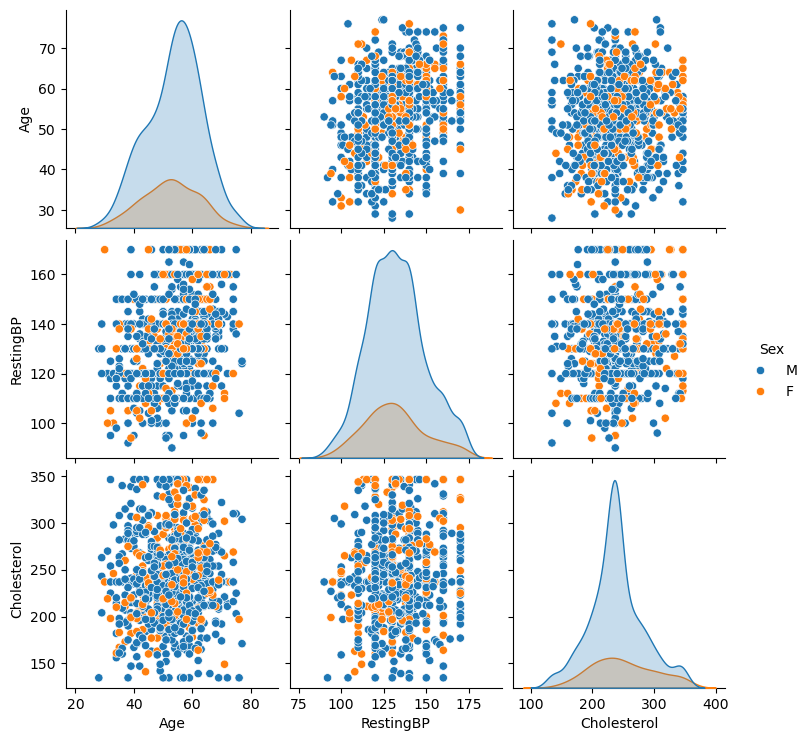

In [27]:
sns.pairplot(hrt_df[['Age','ChestPainType','RestingBP','Sex','Cholesterol']],hue='Sex')
plt.show()

## Encoding

In [28]:
hrt_df.dtypes
hrt_df_encoded = pd.get_dummies(hrt_df, drop_first=True)

In [29]:
hrt_df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,134.5,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


## Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(hrt_df_encoded)
scaled_data

array([[-1.4331398 ,  0.46263892,  1.06055089, ..., -0.8235563 ,
        -1.00218103,  1.15067399],
       [-0.47848359,  1.64417329, -1.35923325, ..., -0.8235563 ,
         0.99782372, -0.86905588],
       [-1.75135854, -0.12812826,  0.92735177, ..., -0.8235563 ,
        -1.00218103,  1.15067399],
       ...,
       [ 0.37009972, -0.12812826, -2.36932663, ...,  1.21424608,
         0.99782372, -0.86905588],
       [ 0.37009972, -0.12812826, -0.1160414 , ..., -0.8235563 ,
         0.99782372, -0.86905588],
       [-1.64528563,  0.34448548, -1.47023252, ..., -0.8235563 ,
        -1.00218103,  1.15067399]])

## Model Building

In [32]:
x=hrt_df_encoded.drop('HeartDisease',axis=1)
x

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,True,False,False,False,True,False,False,True,False
915,57,130.0,134.5,0,115,1.2,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,False,True,False,False,False,False,False,True,False


In [33]:
y=hrt_df_encoded['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model=LogisticRegression()

In [38]:
model=model.fit(xtrain,ytrain)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
ypred=model.predict(xtest)

In [40]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score=accuracy_score(ytest,ypred)

In [42]:
accuracy_score

0.8565217391304348